# Исследование перспективных тарифов для телеком компании

#### Тема проекта:
- Исследование перспективных тарифов для телеком компании

#### Цель:
- Описать поведение пользователей по двум тарифам и протестировать несколько гипотез

#### Поставленные задачи:
- Сделать предобработку данных;
- Произвести расчёты:
 - Рассчитать ежемесячный объем звонков, смс и Мб по каждому пользователю;
 - Рассчитать ежемесячную выручку с каждого пользователя.
- Описать ежемесячное использование услуг для клиентов разных тарифов;
- Проверить две гипотезы:
 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Краткий план работы:
- Шаг 1. Открытие и изучение файла
- Шаг 2. Предобработка и подготовка данных:
 - 2.1. Предобработка данных в датафреймах
 - 2.2. Расчёт показателей для пользователей
- Шаг 3. Описание поведения клиентов
- Шаг 4. Проверка гипотез

#### Вывод:
- Произведены необходимые расчёты;
- Описано поведение клиентов по рассматриваемым тарифам;
- Гипотезы проверены.

**Статус проекта**: проект завершён.

**Используемые библиотеки**: *numpy*, *pandas*, *matplotlib*, *math*, *scipy*

**Источник данных**: [курс Data Science от Яндекс.Практикум](https://praktikum.yandex.ru/profile/data-scientist/)

In [1]:
# отключение предупреждений
import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек и функций для дальнейшей работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import norm
from scipy import stats as st

## Шаг 1. Открытие и изучение файла

Выгрузим файлы и посмотрим общую информацию по данным с помощью функции:

In [2]:
def read_info_open(file_path, date_col_list=False):
    
    """Функция возвращает датафрейм и выводит наименования колонок, количество дубликатов, общую информацию:
    - file_path- путь к файлу .csv;
    - date_col_list - при наличии указать список колонок с датами (в кавычках)."""
    
    if date_col_list == False:
        new_df_name = pd.read_csv(file_path)
    else:
        new_df_name = pd.read_csv(file_path, parse_dates=date_col_list)

    # проверка наименований колонок
    print(new_df_name.columns)
    print()
    
    # проверка на дубликаты
    print('Количество дубликатов:', new_df_name.duplicated().sum())
    print()
    
    # общая информация
    print(new_df_name.info())
    
    # вывод первых строк
    return new_df_name

### Файл calls.csv

In [3]:
# открытие файла calls.csv
calls = read_info_open('datasets/calls.csv', ['call_date'])
calls.head(10)

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


**Выгрузка calls.csv**:

- **Размер**. Таблица имеет **202607 строк** и **4 колонки**.
- **Пропуски**. Пропусков нет, количество в каждой колонке соотсветствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

### Файл internet.csv

In [4]:
# открытие файла internet.csv
internet = read_info_open('datasets/internet.csv', ['session_date'])
internet.head(10)

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Поскольку колонка *Unnamed: 0* появилась в результате технического перенесения данных и не несёт смысловой нагрузки, можем **удалить** её:

In [5]:
internet = internet.drop('Unnamed: 0', axis=1)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


**Выгрузка internet.csv**:

- **Размер**. Таблица имеет **149396 строк** и **4 колонки**.  
- **Пропуски**. Пропусков нет, количество в каждой колонке соотсветствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

### Файл messages.csv

In [6]:
# открытие файла messages.csv
messages = read_info_open('datasets/messages.csv', ['message_date'])
messages.head()

Index(['id', 'message_date', 'user_id'], dtype='object')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Выгрузка messages.csv**:

- **Размер**. Таблица имеет **123036 строк** и **3 колонки**.  
- **Пропуски**. Пропусков нет, количество в каждой колонке соответствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

### Файл tariffs.csv

In [7]:
# открытие файла tariffs.csv
tariffs = read_info_open('datasets/tariffs.csv')
tariffs

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Выгрузка tariffs.csv**:

- Таблица имеет всего **2 строки** и **8 колонок**, описывающих условия тарифов.
- Пропусков, дубликатов, некорректных наименований не обнаружено.

### Файл users.csv

In [8]:
# открытие файла users.csv
users = read_info_open('datasets/users.csv', ['churn_date', 'reg_date'])
users.head(10)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


**Выгрузка users.csv**:

- **Размер**. Таблица имеет **500 строк** и **8 колонок**.  
- **Пропуски**. Пропуски имеются только в колонке *churn_date*. Значение (не пропуск) означает дату, когда клиент **перешел на другой тариф**. В колонке имеется **38 значений**.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

## Шаг 1. Вывод

Мы ознакомились с полученными данными. На первый взгляд в данных нет явных проблем, например, массовых необъяснимых пропусков, некорректного формата. Ниже представлена сводная информация по файлам:

**Выгрузка calls.csv**:
- **Размер**. Таблица имеет **202607 строк** и **4 колонки**.
- **Пропуски**. Пропусков нет, количество в каждой колонке соотсветствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

**Выгрузка internet.csv**:

- **Размер**. Таблица имеет **149396 строк** и **4 колонки**.  
- **Пропуски**. Пропусков нет, количество в каждой колонке соотсветствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

**Выгрузка messages.csv**:

- **Размер**. Таблица имеет **123036 строк** и **3 колонки**.  
- **Пропуски**. Пропусков нет, количество в каждой колонке соответствует общему.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

**Выгрузка tariffs.csv**:

- Таблица имеет всего **2 строки** и **8 колонок**, описывающих условия тарифов.
- Пропусков, дубликатов, некорректных наименований не обнаружено.

**Выгрузка users.csv**:

- **Размер**. Таблица имеет **500 строк** и **8 колонок**.  
- **Пропуски**. Пропуски имеются только в колонке *churn_date*. Значение (не пропуск) означает дату, когда клиент **перешел на другой тариф**. В колонке имеется **38 значений**.
- **Дубликаты**. Явных дубликатов не обнаружено.
- **Имена колонок**. Лишних символов и пробелов не обнаружено.

## Шаг 2. Предобработка и подготовка данных

На данном шаге выделим два этапа :
- 2.1. Предобработка данных в датафреймах
- 2.2. Расчёт показателей для пользователей

### 2.1. Предобработка данных в датафреймах

### Предобработка tariffs

Данные датафрейм состоит всего лишь из 2 строк, в которых содержится **описание тарифов**.  
Все данные совпадают с тем, что указано в условии. Никаких корректировок не требуется.

In [9]:
# вывод всего датафрейма
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Предобработка users

In [10]:
# вывод первых 5 строк
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


##### Колонка user_id

Для начала проверим, чтобы в колонке *user_id* не было повторяющихся идентификаторов:

In [11]:
print('Количество строк всего:', len(users))
print('Количество уникальных значений id:', users.user_id.nunique())

Количество строк всего: 500
Количество уникальных значений id: 500


Всё в порядке, каждому клиенту соответствует свой **user_id**.

##### Колонка age

In [12]:
# вывод сводной статистики
users[['age']].describe()

,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


**Минимальный** возраст равен **18 годам**, **максимальный** - **75 годам**. Данные выглядят правдоподобно.

##### Колонка tariff

Проверим, чтобы в данных было только **2 тарифа** и заодно посмотрим по какому тарифу больше подключений:

In [13]:
# выведем список уникальных значений и количество по каждому из них
users.tariff.value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Всё верно, имеется только **2 тарифа**, как мы и ожидали. Среди выбрынных пользователей больше клиентов более дешёвого **тарифа smart**. 

##### Колонка city, first_name, last_name

Эти колонка не требуются для текущей задачи. Тем не менее, проверим, чтобы все имена собственные были написаны **с большой буквы** и **кириллицей**. 

По **городам** для ознакомления выведем **топ-10 городов** по количеству подключений.  
Затем проверим, чтобы все названия соответствовали заданному **образцу**: название написано кириллицей и начинается с заглавной буквы.

In [14]:
# топ-10 по количеству подключений
users.city.value_counts().head(10)

Москва              99
Санкт-Петербург     39
Новосибирск         16
Казань              14
Омск                14
Уфа                 12
Екатеринбург        11
Ульяновск           11
Краснодар           11
Набережные Челны    11
Name: city, dtype: int64

In [15]:
# проверим города на соответствие образцу

# зададим образец
pattern = '^[А-Я]\w*'
# проверим, чтобы каждое значение соответствовало этому образцу
mask_city = users['city'].str.contains(pattern)

print('Количество городов, начинающихся с заглавной буквы:', mask_city.sum())

Количество городов, начинающихся с заглавной буквы: 500


Проверили, что все 500 городов начинаются с заглавной кириллической буквы.

Теперь проверим **имена** и **фамилии**:

In [16]:
# образец для имени и фамилии
pattern = '^[А-Я]\w*'

# проверка имени first_name
mask_first_name = users['first_name'].str.contains(pattern)
print('Количество имён, начинающихся с заглавной буквы:', mask_city.sum())

# проверка фамилии last_name
mask_last_name = users['last_name'].str.contains(pattern)
print('Количество фамилий, начинающихся с заглавной буквы:', mask_city.sum())

Количество имён, начинающихся с заглавной буквы: 500
Количество фамилий, начинающихся с заглавной буквы: 500


Всё в порядке, все данные колонок соответствуют образцу: начинаются с большой буквы и написаны кириллицей.

##### Колонка reg_date

Посмотрим на год для даты подключения тарифа:

In [17]:
# выведем список уникальных годов в датах
users.reg_date.dt.year.unique()

array([2018], dtype=int64)

В выборке присутствует **только 2018 год**. Соответственно, кто-то подключился раньше, кто-то позже. Сгруппируем подключения **по месяцам**:

In [18]:
# группировка по месяцам: количество подключений
print('Количество подключений в месяц:')
users_by_month = users.groupby(users.reg_date.dt.month)['last_name'].count()
print(users_by_month)

print()

# среднее количество подключений в месяц
print('Среднее количество подключений в месяц: {:.2f}'.format(users_by_month.mean()))
print()

Количество подключений в месяц:
reg_date
1     43
2     39
3     32
4     53
5     41
6     40
7     44
8     50
9     35
10    45
11    42
12    36
Name: last_name, dtype: int64

Среднее количество подключений в месяц: 41.67



В среднем в месяц подключались около **42 человек**. **Минимум** подключений - это **32 подключения**, **маскимум**  - это **53 подключения**.

##### Колонка churn_date

In [19]:
# группировка по месяцам: количество расторжений
print('Количество расторжений в месяц:')
users_by_month_disconnect = users.groupby(users[users['churn_date'].notnull()]['reg_date'].dt.month)['last_name'].count()
print(users_by_month_disconnect)

print()

# среднее количество расторжений в месяц
print('Среднее количество расторжений в месяц: {:.2f}'.format(users_by_month_disconnect.mean()))

Количество расторжений в месяц:
reg_date
1.0     2
2.0     4
3.0     2
4.0     3
5.0     2
6.0     3
7.0     5
8.0     3
9.0     2
10.0    5
11.0    5
12.0    2
Name: last_name, dtype: int64

Среднее количество расторжений в месяц: 3.17


В среднем на каждый месяц приходилось **по 3 расторжения**. **Минимум** - это **2 расторжения**, а **максимум** - это 5 **расторжений** за месяц.

#### Вывод по предобработке users

- **Колонка user_id**. Каждый id клиента на уникальный, повторений нет.

- **Колонка age**. Минимальный возраст **18 лет**, максимальный **75 лет**, что выглядит реалистично.

- **Колонка tariff**. В датафрейме присутствует только 2 исследуемых тарифа. В выборке больше пользователей более дешевого тарифа **"smart"**.

- **Колонка city, first_name, last_name**. Названия в этих колонках начинаются с большой буквы и написаны кирилицей.

- **Колонка reg_date**. В среднем в месяц происходило **42 подключения** к тарифам.

- **Колонка churn_date**. В среднем в месяц расторгалось **по 3 договора**.

### Предобработка calls

In [20]:
# вывод первых 5 строк
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


##### Колонка id

Для начала проверим, чтобы в колонке *id* не было повторяющихся идентификаторов:

In [21]:
print('Количество строк всего:', len(calls))
print('Количество уникальных значений id:', calls.id.nunique())

Количество строк всего: 202607
Количество уникальных значений id: 202607


Всё в порядке, каждый id характеризует отдельную транзакцию.

##### Колонка user_id

Также проверим количество уникальных id пользователей:

In [22]:
print('Количество уникальных значений id пользователей:', calls.user_id.nunique())

Количество уникальных значений id пользователей: 492


Значит, **8 человек** из выбранных 500 вообще не делали никаких звонков.

##### Колонка call_date

Проверим, чтобы все данные были за 2018 год:

In [23]:
# выведем список уникальных годов в датах
calls.call_date.dt.year.unique()

array([2018], dtype=int64)

##### Колонка duration

В этой колонке указана информация по **длительности звонка в минутах**. Было указано важное замечание, что в данных есть **звонки продолжительностью 0.0 минут**, которые могут быть **пропущенными** звонками.

Также можно допустить, что человек **случайно набрал** номер, а потом когда увидел набор, сразу сбросил его. Или же набрал, но затем резко передумал звонить. Но будем считать, что чаще люди не дозваниваются до абонентов, а не делают ложный набор номера.

Посмотрим, сколько всего **пропущенных (нулевых) звонков** в датафрейме:

In [24]:
print('Всего пропущенных (нулевых) звонков:', calls[calls['duration']==0].shape[0])
print('Процент пропущенных (нулевых) звонков: {:.2%}'.format(calls[calls['duration']==0].shape[0] / len(calls)))

Всего пропущенных (нулевых) звонков: 39613
Процент пропущенных (нулевых) звонков: 19.55%


К таким звонкам относится почти **20% всех звонков**, что довольно много.  

Рассмотрим среднюю продолжительность **реального разговора**, т. е. данные без учёта нулевых звонков:

In [25]:
# срез без нулевых звонков
calls_without_zero = calls[calls['duration']!=0]
calls_without_zero.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000


In [26]:
# для сравнения тарифов добавим колонку tariff
calls_without_zero = calls_without_zero.merge(users[['user_id', 'tariff']], on='user_id')

Посмотрим, сколько в среднем длился телефонный звонок **без учёта нулевых звонков**:

In [27]:
# вывод сводной статистики
calls_without_zero.groupby('tariff')[['duration']].describe()

duration                                                    
           count      mean       std   min   25%   50%    75%    max
tariff                                                              
smart   104646.0  8.401447  5.347715  0.01  4.18  7.75  11.86  38.00
ultra    58348.0  8.391242  5.362566  0.01  4.15  7.72  11.84  36.12

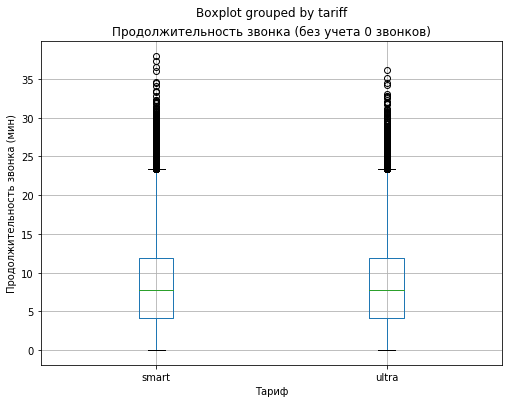

In [28]:
# построение боксплот
calls_without_zero[['duration', 'tariff']].boxplot(by='tariff', figsize=(8,6))
plt.title('Продолжительность звонка (без учета 0 звонков)')
plt.xlabel('Тариф')
plt.ylabel('Продолжительность звонка (мин)')
plt.show()

- **Половина** же всех звонков длилась **от 4 до 12 минут** для обоих тарифов.
- В среднем люди разговаривают **около 7-8 минут**. 
- **Максимум** - это **38 минут**, что выглядит достаточно адекватно.  

Данные, что в среднем люди разговаривают **около 8 минут** и что **максимальный разговор** длися **38 минут** выглядят правдоподобно. Таким образом, количество минут выглядит адекватно.

#### Вывод по предобработке calls

- **Колонка id**. Все значения id - уникальные номера, повторений нет.
- **Колонка user_id**. Из 500 выбранных человек **8 человек** никогда не делали никаких звонков.
- **Колонка call_date**. Все даты соответствуют **2018 году**.

- **Колонка duration**
 - Около **20%** всех звонков - это **пропущенные (нулевые) звонки**.  
 Возможны варианты: человек **хотел** позвонить, но **не дозвонился** либо человек **случайно** набрал номер, а потом сразу **сбросил его сам**.  
 Будем считать, что в большинстве случаев это **пропущенные** звонки.

 - Если **не учитывать нулевые звонки**, то в среднем люди разговаривают **от 4 до 12 минут**.

### Предобработка messages

In [29]:
# вывод первых 5 строк
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


##### Колонка id

Для начала проверим, чтобы в колонке **id** не было повторяющихся идентификаторов:

In [30]:
print('Количество строк всего:', len(messages))
print('Количество уникальных значений id:', messages.id.nunique())

Количество строк всего: 123036
Количество уникальных значений id: 123036


Всё в порядке, каждый id характеризует отдельное действие.

##### Колонка user_id

Также проверим количество уникальных id пользователей:

In [31]:
print('Количество уникальных значений id пользователей:', messages.user_id.nunique())

Количество уникальных значений id пользователей: 426


Значит, **74 человек** из выбранных 500 вообще не пользовались услугой отправки sms, это почти **15%**.    
Такое значительное число можно объяснить тем, что в последнее время люди предпочитают пользоваться мессенджерами, используя подключение к интернету.

##### Колонка message_date

По аналогии с телефонными звонками, проверим, чтобы все даты относились к **2018 году**:

In [32]:
# выведем список уникальных годов в датах
messages.message_date.dt.year.unique()

array([2018], dtype=int64)

#### Вывод по предобработке messages

- **Колонка id**. Все значения id - уникальные номера, повторений нет.

- **Колонка user_id**. Из 500 выбранных человек **74 человека** никогда не отправляли sms.

- **Колонка message_date**. Все даты соответствуют **2018 году**.

### Предобработка internet

In [33]:
# вывод первых 5 строк
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


##### Колонка id
Аналогично предыдущему датафрейму, проверим, чтобы в колонке id не было повторяющихся идентификаторов:

In [34]:
print('Количество строк всего:', len(internet))
print('Количество уникальных значений id:', internet.id.nunique())

Количество строк всего: 149396
Количество уникальных значений id: 149396


##### Колонка user_id

In [35]:
print('Количество уникальных значений id пользователей:', internet.user_id.nunique())

Количество уникальных значений id пользователей: 497


Значит, **3 человека** из выбранных 500 никогда **не подключались к интернету**.

##### Колонка session_date

In [36]:
# выведем список уникальных годов в датах
internet.session_date.dt.year.unique()

array([2018], dtype=int64)

Всё в порядке, все данные относятся к **2018 году**.

##### Колонка mb_used

По аналогии с телефонными звонками, посмотрим на количество подключений с **нулевым расходом трафика**.  

Скорее всего, человек подключился к интернету (возможно, даже случайно), но не заходил в приложения / не искал информацию.  
Есть ещё вариант, что человек **хотел** подключиться и уже подключился (что отразилось как начало сесии), но по какой-то причине **не смог загрузить** данные. Это стоит отдельной проверки, почему подключение не было удачным.

In [37]:
print('Всего подключений с нулевым расходом трафика:', internet[internet['mb_used']==0].shape[0])
print('Процент подключений с нулевым расходом трафика: {:.2%}'.format(internet[internet['mb_used']==0].shape[0] / len(internet)))

Всего подключений с нулевым расходом трафика: 19598
Процент подключений с нулевым расходом трафика: 13.12%


Таких ложных либо неудачных подключений оказалось **порядка 13%**.

Для удобства создадим датафрейм **без учёта нулевого трафика**:

In [38]:
internet_without_zero = internet[internet['mb_used']!=0]
internet_without_zero.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [39]:
# для сравнения тарифов добавим колонку tariff
internet_without_zero = internet_without_zero.merge(users[['user_id', 'tariff']], on='user_id')

In [40]:
# вывод сводной статистики
internet_without_zero.groupby('tariff')[['mb_used']].describe()

mb_used                                                             \
          count        mean         std   min       25%      50%       75%   
tariff                                                                       
smart   93716.0  385.510421  237.415281  0.03  200.0775  358.300  540.4425   
ultra   36082.0  531.477555  270.608252  0.09  331.9400  517.555  713.7100   

                 
            max  
tariff           
smart   1575.26  
ultra   1724.83

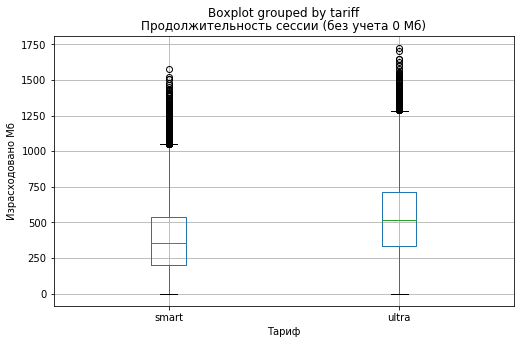

In [41]:
# построение боксплот
internet_without_zero[['mb_used', 'tariff']].boxplot(by='tariff', figsize=(8, 5))
plt.title('Продолжительность сессии (без учета 0 Мб)')
plt.xlabel('Тариф')
plt.ylabel('Израсходовано Мб')
plt.show()

По сводной статистике и графикам видим следующее:

- **Минимум** для ненулевого подключения - это **0.03 Мб**. 
- **Максимум 1724.8 Мб** тоже выглядит реалистично, если человек использовал мобильный интернет, например, для просмотра сериалов.
- **Половина** всех подключений для **smart** приходится на промежуток **от 200 до 540 Мб**, а для **ultra** - **от 332 до 714 Мб**.
- Для **smart** выборочное **среднее** и **медиана** равны **386 Мб** и **358 Мб** соответственно; для **ультра** эти значения равны **531 Мб** и **518 Мб**.

В целом значения можно признать правдоподобными и продолжить работу с текущими данными.

#### Вывод по предобработке internet

- **Колонка id**. Все значения id - уникальные номера, повторений нет.
- **Колонка user_id**. Из 500 выбранных человек **3 человека** никогда **не пользовались** мобильным интернетом.
- **Колонка session_date**. Все даты соответствуют **2018 году**.

- **Колонка mb_used**
 - Около **13%** всех подключений - подключение с расходом **0 Мб**. Возможно, это случайное или неудачное подключение.
 - Если **не учитывать нулевые подключения**, то в среднем люди тратят на сессию **от 200 до 540 Мб** для тарифа **смарт** и **от 332 до 714 Мб** для тарифа **ультра**.

### 2.2. Расчёт показателей для пользователей
Рассчитаем для каждого пользователя:
1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Помесячную выручку с каждого пользователя.

### 1. Количество сделанных звонков и израсходованных минут разговора по месяцам

Выведем таблицу, где будет указано:
- id пользователя
- номер месяца
- общее количество звонков;
- количество "нулевых" (пропущенных) звонков;
- суммарное количестов минут разговора.

Создадим отдельный столбец, взяв **месяц** звонка из даты. Для этого создадим новую колонку *call_date*:

In [42]:
# берем месяц из даты
calls['user_month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,user_month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Сделаем группировку **по пользователю и месяцам**:

In [43]:
# группировка по всем пользователям и месяцам
user_call_group = calls.groupby(['user_id', 'user_month'])[['duration']].agg(['count', 'sum'])
user_call_group.columns = ['call_times', 'total_min']
user_call_group.head()

call_times  total_min
user_id user_month                       
1000    5                   22     150.06
        6                   43     158.90
        7                   47     318.80
        8                   52     389.87
        9                   58     440.14

Около **20% всех звонков** являются **нулевыми звонками** (пропущенные, случайно набранные и др.).  
Выведем дополнительно **количество "пропущенных звонков"**.

In [44]:
# группировка по пропущенным звонкам
# срез duration == 0
user_call_group_zero = calls[calls['duration'] == 0].groupby(['user_id', 'user_month'])[['duration']].agg(['count'])
user_call_group_zero.columns = ['call_times_zero']
user_call_group_zero.head()

call_times_zero
user_id user_month                 
1000    5                         5
        6                        15
        7                         6
        8                        10
        9                        12

In [45]:
# присоединим пропущенные звонки к общим звонкам
user_call = pd.concat([user_call_group, user_call_group_zero], axis=1, join='outer')

# для большей наглядности поменяем колонки местами
user_call = user_call[['call_times', 'call_times_zero', 'total_min']]

user_call.head(15)

call_times  call_times_zero  total_min
user_id user_month                                        
1000    5                   22              5.0     150.06
        6                   43             15.0     158.90
        7                   47              6.0     318.80
        8                   52             10.0     389.87
        9                   58             12.0     440.14
        10                  57             13.0     328.45
        11                  43              6.0     319.04
        12                  46              8.0     312.98
1001    11                  59             14.0     408.12
        12                  63             16.0     391.34
1002    6                   15              1.0     110.37
        7                   26              5.0     204.75
        8                   42              5.0     269.71
        9                   36             11.0     195.85
        10                  33              9.0     199.48

Ранее мы выяснили, что из 500 человек **8 человек никогда не делало никаких звонков**.  
Проверим, чтобы количество уникальных пользователей осталось прежним:

In [46]:
# проверка не пропущенных значений
print('Количество уникальных значений id пользователей:', user_call.reset_index()['user_id'].nunique())

Количество уникальных значений id пользователей: 492


Все в порядке, количество совпадает - 492 человека.

Мы вывели по каждому пользователю информацию по **израсходованным минутам** и **количеству звонков** в месяц.  

Также мы решили добавить **количество нулевых звонков**. Потенциально эта информация помогает понять **долю "успешных" звонков** по каждому пользователю в месяц и **среднюю продолжительность** разговора, учитывая только успешные звонки.

### 2. Количество отправленных сообщений по месяцам

Выведем таблицу, где будет указано:
- id пользователя
- номер месяца
- общее количество сообщений за месяц

Воспользуемся той же логикой и выведем сначала месяц из даты, затем сгруппируем данные **по пользователям и месяцам**.

In [47]:
# берем месяц из даты
messages['user_month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,user_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [48]:
# группировка по всем пользователям и месяцам
user_message = messages.groupby(['user_id', 'user_month'])[['id']].agg(['count'])
user_message.columns = ['total_messages']
user_message.head(10)

total_messages
user_id user_month                
1000    5                       22
        6                       60
        7                       75
        8                       81
        9                       57
        10                      73
        11                      58
        12                      70
1002    6                        4
        7                       11

In [49]:
# проверка не пропущенных значений
print('Количество уникальных значений id пользователей:', user_message.reset_index()['user_id'].nunique())

Количество уникальных значений id пользователей: 426


Мы вывели запрашиваемую информацию по пользователям: кто, в какие месяца и сколько отправлял смс.

### 3. Объем израсходованного интернет-трафика по месяцам

Выведем таблицу, где будет указано:
- id пользователя
- номер месяца
- израсходованный трафик (в Мб)

Проделаем те же шаги, что и для звонков и сообщений:

In [50]:
# берем месяц из даты
internet['user_month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,user_month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [51]:
# группировка по всем пользователям и месяцам
user_internet = internet.groupby(['user_id', 'user_month'])[['mb_used']].agg(['sum'])
user_internet.columns = ['total_mb']
user_internet.head(10)

total_mb
user_id user_month          
1000    5            2253.49
        6           23233.77
        7           14003.64
        8           14055.93
        9           14568.91
        10          14702.49
        11          14756.47
        12           9817.61
1001    11          18429.34
        12          14036.66

In [52]:
# проверка не пропущенных значений
print('Количество уникальных значений id пользователей:', user_internet.reset_index()['user_id'].nunique())

Количество уникальных значений id пользователей: 497


Мы вывели запрашиваемую информацию по пользователям: расход трафика Мб по клиенту по месяцам.

### 4. Помесячная выручка с каждого пользователя

Данный шаг будет разбит на несколько этапов:
- 4.1. Соединение данных
- 4.2. Обработка пропусков
- 4.3. Вычисление стоимости услуг

Соединим полученную информацию по звонкам, сообщениям и интернету:

#### 4.1. Соединение данных

In [53]:
# соединение трех датафреймов
revenue = pd.concat([user_call, user_message, user_internet], axis=1, join='outer')
revenue.head(10)

call_times  call_times_zero  total_min  total_messages  \
user_id user_month                                                           
1000    5                 22.0              5.0     150.06            22.0   
        6                 43.0             15.0     158.90            60.0   
        7                 47.0              6.0     318.80            75.0   
        8                 52.0             10.0     389.87            81.0   
        9                 58.0             12.0     440.14            57.0   
        10                57.0             13.0     328.45            73.0   
        11                43.0              6.0     319.04            58.0   
        12                46.0              8.0     312.98            70.0   
1001    11                59.0             14.0     408.12             NaN   
        12                63.0             16.0     391.34             NaN   

                    total_mb  
user_id user_month            
1000    5            2253.49  
        6           23233.77  
        7           14003.64  
        8           14055.93  
        9           14568.91  
        10          14702.49  
        11          14756.47  
        12           9817.61  
1001    11          18429.34  
        12          14036.66

Посмотрим, есть ли люди, которые, хоть и были подключены, но **никогда** не пользовались какими-либо услугами.  
Для этого установим в рабочем датафрейме и датафрейме users в качестве индекса **user_id** и проверим данные на совпадение индексов:

In [54]:
# индекс user_id для revenue_draft1
revenue = revenue.reset_index().set_index('user_id')
revenue.head()

,user_month,call_times,call_times_zero,total_min,total_messages,total_mb
user_id,,,,,,
1000,5,22.0,5.0,150.06,22.0,2253.49
1000,6,43.0,15.0,158.90,60.0,23233.77
1000,7,47.0,6.0,318.80,75.0,14003.64
1000,8,52.0,10.0,389.87,81.0,14055.93
1000,9,58.0,12.0,440.14,57.0,14568.91


In [55]:
# индекс user_id для users
users.set_index('user_id', inplace=True)
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [56]:
# проверим какие индексы (user_id) отсутствуют в revenue_draft1
users.loc[~(users.index.isin(revenue.index))]

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Да, **2 человека** никогда не пользовались включёнными услугами. Но стоит отметить, что после 7 и 17 дней соответственно они **расторгли** договор. 

Итак, мы соединили информация по трём сервисам, проверили количество уникальных пользователей и выяснили, что два человека вообще никогда не пользовались тарифами. Продолжим дополнение рабочего датафрейма.

Нам потребуется знание **тарифа** пользователя, чтобы узнать его бесплатный **лимит** по всем трем способам связи и стоимость услуг **сверх пакета**. Дополним рабочий датафрейм информацией из датафрейма users:

In [57]:
# соединение датафреймов 
revenue = pd.concat([revenue, users[['tariff']]], axis=1, join='inner')
revenue.head(10)

,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff
user_id,,,,,,,
1000,5,22.0,5.0,150.06,22.0,2253.49,ultra
1000,6,43.0,15.0,158.90,60.0,23233.77,ultra
1000,7,47.0,6.0,318.80,75.0,14003.64,ultra
1000,8,52.0,10.0,389.87,81.0,14055.93,ultra
1000,9,58.0,12.0,440.14,57.0,14568.91,ultra
1000,10,57.0,13.0,328.45,73.0,14702.49,ultra
1000,11,43.0,6.0,319.04,58.0,14756.47,ultra
1000,12,46.0,8.0,312.98,70.0,9817.61,ultra
1001,11,59.0,14.0,408.12,NaN,18429.34,smart


Вспомним информацию по **тарифам**:

In [58]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для удобства единообразия **поменяем колонки местами** и **переимунуем** их:

In [59]:
# выберем нужные колонки
tariffs_concat = tariffs[['tariff_name', 'minutes_included', 'messages_included', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_minute', 'rub_per_message', 'rub_per_gb']]

# переименуем колонки
tariffs_concat.columns = ['tariff', 'incl_min', 'incl_messages', 'incl_mb', 'mothly_fee', 'per_min', 'per_message', 'per_gb']

tariffs_concat

,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb
0,smart,500,50,15360,550,3,3,200
1,ultra,3000,1000,30720,1950,1,1,150


Соединим информацию из рабочего датафрейма и информацию по тарифам:

In [60]:
# сбросим индексы в revenue
revenue.reset_index(inplace=True)

# соединение информации из двух датафреймов
revenue = pd.merge(revenue, tariffs_concat, on='tariff')
revenue.head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,30720,1950,1,1,150
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,30720,1950,1,1,150
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,30720,1950,1,1,150
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,30720,1950,1,1,150
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,30720,1950,1,1,150


#### 4.2. Обработка пропусков

Бывают ситуации, что в течение месяца человек **не пользовался каким-либо из видов связи**, например, сообщениями.  
Если это так, то в колонках будут **пропуски**. Проверим количество пропусков по каждому из видов связи:

In [61]:
# пропуски по колонкам
revenue.isnull().sum()

user_id              0
user_month           0
call_times          40
call_times_zero     95
total_min           40
total_messages     497
total_mb            11
tariff               0
incl_min             0
incl_messages        0
incl_mb              0
mothly_fee           0
per_min              0
per_message          0
per_gb               0
dtype: int64

Будем считать, что если человек не пользовался этим видом связи в определенный месяц, значит, **пропуск** в колонке звонков / сообщений / Мб, а также количество звонков можно **заменить на ноль**.  

Есть нюанс в том, что у нас есть **нулевые звонки и Мб** в исходных данных. Но суть всё равно одна - в итоге человек **не потратил** минуты и т. п. для связи. Значит, плата за это будет 0. Поэтому заполним **пропуски нулями**:

In [62]:
# заполнение пропусков
for col_name in ['call_times', 'call_times_zero', 'total_min', 'total_messages', 'total_mb']:
    revenue[col_name] = revenue[col_name].fillna(0)

# пропуски по колонкам
revenue.isnull().sum()

user_id            0
user_month         0
call_times         0
call_times_zero    0
total_min          0
total_messages     0
total_mb           0
tariff             0
incl_min           0
incl_messages      0
incl_mb            0
mothly_fee         0
per_min            0
per_message        0
per_gb             0
dtype: int64

Итак, мы соединили нужную информацию и обработали пропуски. Приступим к **вычислениям стоимости услуг**.

#### 4.3. Вычисление стоимости услуг

Рассчитаем для каждого пользователя количество **дополнительных минут, сообщений, Мб**. 
Для этого напишем функцию, которая будет принимать на вход **три параметра**:
- названия **двух колонок** для вычислений: потраченное количество (total) и включенное в пакет количество (included)
- новое название колонки

Функция будет вычислять новую колонку, давать ей указанное название и сразу присоединять её к рабочему датафрейму. Результат округляется в бóльшую сторону (по условию это нужно для **минут** и **Мб**). Потенциально можно было бы задать четвертый параметр - название рабочего датафрейма, но не будем увеличивать количество параметров и обойдемся тремя.  

Важный нюанс: соединение построено на **индексах**, поэтому индексы в рабочем датафрейме должны быть порядковыми (RangeIndex).

In [63]:
def positive_or_zero(col_total, col_incl, new_extra_name):
    
    """Функция принимает названия колонок и присоединяет результат вычисления к рабочему датафрейму.
    - col_total - название колонки с потраченным количеством total (минуты, сообщения, Мб)
    - col_incl - название колонки с включенным в пакет количеством (минуты, сообщения, Мб)
    - new_extra_name - название новой колонки, которую хотим присоединить к рабочему датафрейму
    Важно! Соединение построено на индексах, поэтому индексы в рабочем датафрейме должны быть порядковыми (RangeIndex)."""
    
    # создаем пустой список
    new_list = []
    
    # делаем итерацию по всем строкам рабочего датафрейма
    for i in range(len(revenue)):
        
        # выбираем из строки количество total
        total_number = revenue.loc[i, col_total]
        
        # выбираем из строки количество included
        incl_number = revenue.loc[i, col_incl]
        
        # если total превышает included, необходимо рссчитать разницу
        # разница добавляется в список
        if  total_number > incl_number:
            
            # округляем тотал значения вверх
            diff = mt.ceil(total_number) - incl_number
            new_list.append(diff)
        
        # в противном случае, добавляется 0
        else:
            new_list.append(0)
    
    # превращаем список в датафрейм
    new_df = pd.DataFrame(new_list)
    # присваиваем датафрейму нужное название (параметр 3)
    new_df.columns = [new_extra_name]
    
    # возвращаем операцию присоединения полученной колонки к рабочему датафрейму
    return pd.concat([revenue, new_df], axis=1)

Применим функцию и посмотрим на полученный результат:

In [64]:
revenue = positive_or_zero('total_min', 'incl_min', 'extra_min')
revenue = positive_or_zero('total_messages', 'incl_messages', 'extra_messages')
revenue = positive_or_zero('total_mb', 'incl_mb', 'extra_mb')

revenue.head(20)

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,30720,1950,1,1,150,0,0,0
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,30720,1950,1,1,150,0,0,0
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,30720,1950,1,1,150,0,0,0
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,30720,1950,1,1,150,0,0,0
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,30720,1950,1,1,150,0,0,0
5,1000,10,57.0,13.0,328.45,73.0,14702.49,ultra,3000,1000,30720,1950,1,1,150,0,0,0
6,1000,11,43.0,6.0,319.04,58.0,14756.47,ultra,3000,1000,30720,1950,1,1,150,0,0,0
7,1000,12,46.0,8.0,312.98,70.0,9817.61,ultra,3000,1000,30720,1950,1,1,150,0,0,0
8,1003,8,55.0,12.0,355.67,37.0,8565.21,ultra,3000,1000,30720,1950,1,1,150,0,0,0
9,1003,9,134.0,29.0,904.89,91.0,12468.87,ultra,3000,1000,30720,1950,1,1,150,0,0,0


Дополнительно убедимся в том, что наша функция отработала верно и **проверим несколько значений**:

In [65]:
# проверка телефонных звонков
revenue[revenue['total_min'] > revenue['incl_min']].head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb
996,1005,3,77.0,14.0,573.54,56.0,11104.25,smart,500,50,15360,550,3,3,200,74,6,0
997,1005,4,101.0,24.0,670.20,41.0,9351.72,smart,500,50,15360,550,3,3,200,171,0,0
998,1005,5,73.0,11.0,565.62,42.0,7865.53,smart,500,50,15360,550,3,3,200,66,0,0
999,1005,6,80.0,11.0,577.57,47.0,9863.19,smart,500,50,15360,550,3,3,200,78,0,0
1000,1005,7,77.0,15.0,536.43,56.0,7694.56,smart,500,50,15360,550,3,3,200,37,6,0


In [66]:
# проверка сообщений
revenue[revenue['total_messages'] > revenue['incl_messages']].head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb
996,1005,3,77.0,14.0,573.54,56.0,11104.25,smart,500,50,15360,550,3,3,200,74,6,0
1000,1005,7,77.0,15.0,536.43,56.0,7694.56,smart,500,50,15360,550,3,3,200,37,6,0
1001,1005,8,71.0,7.0,586.79,64.0,7543.63,smart,500,50,15360,550,3,3,200,87,14,0
1002,1005,9,66.0,9.0,447.17,52.0,7016.46,smart,500,50,15360,550,3,3,200,0,2,0
1004,1005,11,75.0,15.0,523.34,51.0,12666.95,smart,500,50,15360,550,3,3,200,24,1,0


In [67]:
# проверка интернета
revenue[revenue['total_mb'] > revenue['incl_mb']].head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb
50,1024,11,157.0,30.0,1083.14,0.0,43107.47,ultra,3000,1000,30720,1950,1,1,150,0,0,12388
51,1024,12,136.0,28.0,898.21,0.0,35948.13,ultra,3000,1000,30720,1950,1,1,150,0,0,5229
78,1050,7,35.0,9.0,196.35,52.0,35177.91,ultra,3000,1000,30720,1950,1,1,150,0,0,4458
97,1060,12,184.0,40.0,1163.11,52.0,43931.36,ultra,3000,1000,30720,1950,1,1,150,0,0,13212
228,1124,10,152.0,22.0,1159.82,121.0,49745.69,ultra,3000,1000,30720,1950,1,1,150,0,0,19026


Функция отработала корректно, проверка прошла успешно.  

Дополнительно добавим ещё колонки со **стоимостью услуг сверх пакета**.

Для **звонков** и **сообщений** стоимость высчитывается путём **умножения** количества на цену.  
Для **интернета** есть отличие: если человек израсходовал хотя бы несколько Мб сверх пакета, ему сразу дают Гб. Поэтому создадим ещё один столбец с Гб для удобства.

In [68]:
# делим Мб на 1024 и округляем вверх
revenue['extra_gb'] = (revenue['extra_mb'] / 1024).apply(mt.ceil)

# проверим, что получилось
revenue[revenue['extra_gb'] > 0].head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,incl_mb,mothly_fee,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb,extra_gb
50,1024,11,157.0,30.0,1083.14,0.0,43107.47,ultra,3000,1000,30720,1950,1,1,150,0,0,12388,13
51,1024,12,136.0,28.0,898.21,0.0,35948.13,ultra,3000,1000,30720,1950,1,1,150,0,0,5229,6
78,1050,7,35.0,9.0,196.35,52.0,35177.91,ultra,3000,1000,30720,1950,1,1,150,0,0,4458,5
97,1060,12,184.0,40.0,1163.11,52.0,43931.36,ultra,3000,1000,30720,1950,1,1,150,0,0,13212,13
228,1124,10,152.0,22.0,1159.82,121.0,49745.69,ultra,3000,1000,30720,1950,1,1,150,0,0,19026,19


Теперь можем перейти к **вычислению стоимости** по всем видам услуг:

In [69]:
# рассчитаем для каждой услуги финальную стоимость
revenue['extra_min_fee'] = revenue['extra_min'] * revenue['per_min']
revenue['extra_message_fee'] = revenue['extra_messages'] * revenue['per_message']
revenue['extra_gb_fee'] = revenue['extra_gb'] * revenue['per_gb']

# проверим, что получилось
revenue.query('extra_min > 0').head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,per_min,per_message,per_gb,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee
996,1005,3,77.0,14.0,573.54,56.0,11104.25,smart,500,50,...,3,3,200,74,6,0,0,222,18,0
997,1005,4,101.0,24.0,670.20,41.0,9351.72,smart,500,50,...,3,3,200,171,0,0,0,513,0,0
998,1005,5,73.0,11.0,565.62,42.0,7865.53,smart,500,50,...,3,3,200,66,0,0,0,198,0,0
999,1005,6,80.0,11.0,577.57,47.0,9863.19,smart,500,50,...,3,3,200,78,0,0,0,234,0,0
1000,1005,7,77.0,15.0,536.43,56.0,7694.56,smart,500,50,...,3,3,200,37,6,0,0,111,18,0


Вычислим **финальную месячную стоимость** для каждого **абонента**, сложив абонентскую плату и плату за услуги сверх пакета:

In [70]:
revenue['final_monthly_payment'] = revenue['mothly_fee'] + revenue['extra_min_fee'] + revenue['extra_message_fee'] + revenue['extra_gb_fee']
revenue.head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,per_message,per_gb,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee,final_monthly_payment
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950


Ещё раз проверим, чтобы не было не учтённых дополнительных услуг: сумма по всем колонкам с доп.услугами должна быть равна нулю.

In [71]:
for col_name in ['extra_min', 'extra_messages', 'extra_mb']:
    print(revenue.query('tariff == "smart" and final_monthly_payment == 550')[col_name].sum())
    
for col_name in ['extra_min', 'extra_messages', 'extra_mb']:
    print(revenue.query('tariff == "ultra" and final_monthly_payment == 1950')[col_name].sum())

0
0
0
0
0
0


Работа над датафреймом закончена, необходимые показатели получены.

## Шаг 2. Вывод
    
Мы разбили шаг на два этапа:
- На **первом этапе** мы проверили данные всех исходных датафреймов на предмет адекватности. Например, сколько уникальных id есть в колонке, какие даты содержатся в колонках, сколько минут в среднем разговаривали люди. 
    
- На **втором этапе** мы сгруппировали данные по пользователям и месяцам **по каждому из видов услуг**, соединили данные и дополнили **стоимостью** из информации по тарифам. В итоге мы рассчитали **финальную стоимость** услуг для пользователя в данном месяце.  
При расчёте было учтено, что звонки и Мб округляются в бóльшую сторону и что для Мб при использовании дополительного трафика даётся сразу дополнительный Гб.

## Шаг 3. Описание поведения клиентов

Исходя из выборочных данных, необходимо описать, сколько **минут разговора**, сколько **сообщений** и какой **объём интернет-трафика** требуется пользователям каждого тарифа в месяц. Также необходимо описать **распределение** данных по каждому виду услуг.

Рассмотрим каждый вид услуги отдельно и разобьём шаг на следующие этапы:
- 3.1. Телефонные звонки
- 3.2. Сообщения
- 3.3. Интернет

### 3.1. Телефонные звонки

Нас интересует сколько **минут в месяц** использует человек. На предыдущем шаге мы посчитали **сумму минут за месяц** по каждому клиенту. **Пропуски** означали, что клиент не пользовался данной услугой в этом месяце. Было принято решение заменить **пропуск на ноль**.

Сделаем срезы по двум тарифам и посмотрим на сводную статистику и боксплот:

In [72]:
# вывод сводной статистики
revenue.groupby('tariff')[['total_min']].describe()

total_min                                                              
           count        mean         std  min     25%     50%     75%      max
tariff                                                                        
smart     2229.0  394.427026  179.962207  0.0  267.23  397.98  515.07  1354.22
ultra      985.0  497.068223  299.904152  0.0  267.75  488.10  711.47  1578.06

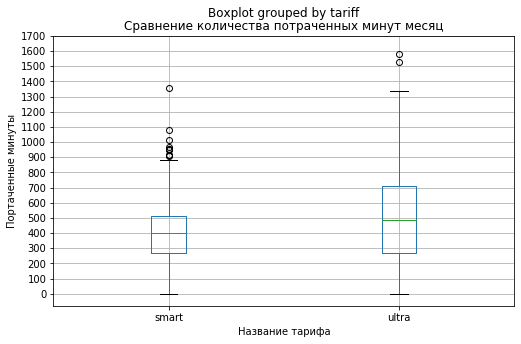

In [73]:
# построение боксплот
revenue.boxplot('total_min', by='tariff', figsize=(8, 5))

plt.title('Сравнение количества потраченных минут месяц')
plt.xlabel('Название тарифа')
plt.ylabel('Портаченные минуты')
plt.yticks([i*100 for i in range(18)])
plt.show()

- По тарифу **smart** выбранные клиенты в основном укладываются в **400 минут в месяц** (включено в тариф 500 минут), а по тарифу **ultra** в **500 минут** (включено 3000 минут).
- При этом размах у **ultra шире**, чем у **smart**: первая квартиль располагается на уровне первой квартили тарифа **smart** (около 267 минут), а третья квартиль - на уровне 711 минут.

Чтобы оценить **реальное** время разговора, можно изучить результат **без учёта нулевых звонков**. Напомним, что **нулевой звонок** означает либо **изначально нулевое** значение, либо **замену пропуска** на ноль (т. е. человек не пользовался услугой).

Посчитаем, какой процент строк содержит **нулевые значения**:

In [74]:
smart_zero = len(revenue.query('total_min==0 and tariff=="smart"'))
smart_total = len(revenue.query('tariff=="smart"'))
print('Доля нулевых звонков для тарифа smart: {:.2%}'.format(smart_zero / smart_total))

ultra_zero = len(revenue.query('total_min==0 and tariff=="ultra"'))
ultra_total = len(revenue.query('tariff=="ultra"'))
print('Доля нулевых звонков для тарифа ultra: {:.2%}'.format(ultra_zero / ultra_total))

Доля нулевых звонков для тарифа smart: 0.36%
Доля нулевых звонков для тарифа ultra: 3.86%


Видим, что если для **smart** нулевые звонки составляют **меньше процента**, то для **ultra** этот показатель уже выше - **3.86%**.  
Посмотрим сводную статистику для данных **без нулевых звонков**:

In [75]:
# вывод сводной статистики
revenue.query('total_min > 0').groupby('tariff')[['total_min']].describe()

total_min                                                         \
           count        mean         std   min     25%     50%      75%   
tariff                                                                    
smart     2221.0  395.847744  178.718947  1.37  268.79  398.85  515.390   
ultra      947.0  517.013939  288.500085  0.10  294.40  498.95  715.605   

                 
            max  
tariff           
smart   1354.22  
ultra   1578.06

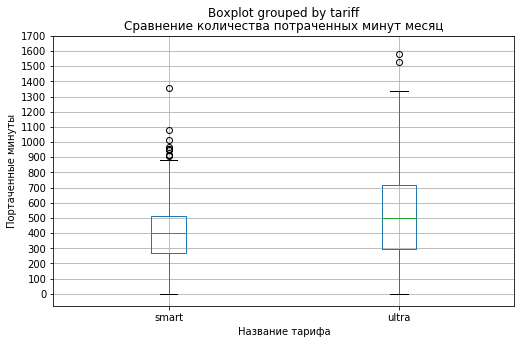

In [76]:
# построение боксплот
revenue.query('total_min > 0').boxplot('total_min', by='tariff', figsize=(8, 5))

plt.title('Сравнение количества потраченных минут месяц')
plt.xlabel('Название тарифа')
plt.ylabel('Портаченные минуты')
plt.yticks([i*100 for i in range(18)])
plt.show()

- Время без учёта нулевых звонков для **smart** осталось практически таким же. Для **ultra** среднее время разговора **увеличилось** практически на **20 минут**.

По поводу пропусков и нулевых значений можно отметить, что, возможно, в рамках одного тарифа следует дополнительно выделять **подгруппы** - например, клиентов, которым нужны **только звонки** и клиентов, которым нужен **только интернет**.  
Усреднять таких клиентов под **один тариф** и говорить, что в среднем по этому тарифу разговаривают столько-то минут проблематично из-за **разного поведения** подгрупп **внутри тарифа**.  

В рамках задачи мы остановимся на усредненных показателях для двух тарифов. Но в целом было бы любопытно выделить подгруппы людей, которые концентрируются на разных видах связи.

Необходимо предоставить таблицу, где для каждого тарифа будут вычислены статистики по услугам: **среднее**, **стандартное отклонение**, **дисперсия**. Создадим финальную **таблицу со статистиками по обоим тарифам** и на каждом шаге будем заносить полученные данные.

In [77]:
# создание таблицы
tariffs_stat = pd.DataFrame({
    
    'tariff': ['smart', 'smart', 'smart', 'ultra', 'ultra', 'ultra'],
    'service':['calls_min', 'messages', 'internet_mb', 'calls_min', 'messages', 'internet_mb'],
    'mean': ['-', '-', '-', '-', '-', '-'],
    'std': ['-', '-', '-', '-', '-', '-'],
    'var': ['-', '-', '-', '-', '-', '-']
})

tariffs_stat

,tariff,service,mean,std,var
0,smart,calls_min,-,-,-
1,smart,messages,-,-,-
2,smart,internet_mb,-,-,-
3,ultra,calls_min,-,-,-
4,ultra,messages,-,-,-
5,ultra,internet_mb,-,-,-


In [78]:
# тариф smart
tariffs_stat.loc[0, 'mean'] = revenue.query('tariff == "smart"')['total_min'].mean()
tariffs_stat.loc[0, 'std'] = revenue.query('tariff == "smart"')['total_min'].std()
tariffs_stat.loc[0, 'var'] = revenue.query('tariff == "smart"')['total_min'].std() ** 2
# тариф ultra
tariffs_stat.loc[3, 'mean'] = revenue.query('tariff == "ultra"')['total_min'].mean()
tariffs_stat.loc[3, 'std'] = revenue.query('tariff == "ultra"')['total_min'].std()
tariffs_stat.loc[3, 'var'] = revenue.query('tariff == "ultra"')['total_min'].std() ** 2

tariffs_stat

,tariff,service,mean,std,var
0,smart,calls_min,394.427,179.962,32386.4
1,smart,messages,-,-,-
2,smart,internet_mb,-,-,-
3,ultra,calls_min,497.068,299.904,89942.5
4,ultra,messages,-,-,-
5,ultra,internet_mb,-,-,-


Посмотрим на одной гистограмме, как соотносятся данные по пользователям **разных тарифов**.  
Поскольку в подвыборках по тарифам разное количество людей, нормируем данные:

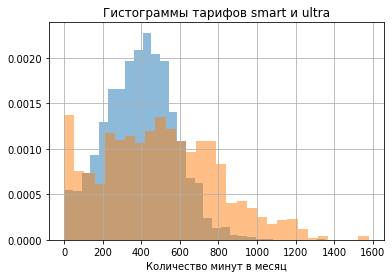

In [79]:
# гистограмма для тарифа smart
revenue.query('tariff == "smart"')['total_min'].hist(bins=30, alpha=0.5, normed=True)
# гистограмма для тарифа ultra
revenue.query('tariff == "ultra"')['total_min'].hist(bins=30, alpha=0.5, normed=True)

plt.title('Гистограммы тарифов smart и ultra')
plt.xlabel('Количество минут в месяц')
plt.show()

- В тарифе **smart**  более ярко вырыженный пик и в целом визуально гистограмма больше напоминает нормальное распределение, чем в **ultra**.
- В тарифе **ultra** наблюдается более широкий размах (что мы видели ещё на боксплоте). Также виден **пик**, который приходится на "околонулевые" значения. На этот пик повлияла в т. ч. **замена пропусков на 0**.

Для бóльшей наглядности наложим на каждую из гистограмм **кривую нормального распределения**. Для этого потребуется **среднее** и **стандартное отклонение**, которые уже были рассчитаны.

Также можно наложить на график **вертикальную линию**, которая будет соответствовать значению **лимита включенных звонков**. Для тарифа **smart** это **500 минут**, а для **ultra** это **3000 минут**.

Сначала построим **гистограмму** с **кривой нормального распредления** для тарифа **smart**:

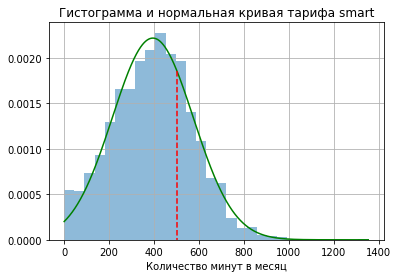

In [80]:
# mean и std берем из предыдущего шага
mu = revenue.query('tariff == "smart"')['total_min'].mean()
sigma = revenue.query('tariff == "smart"')['total_min'].std()

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "smart"')['total_min'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "smart"')['total_min'].hist(bins=30, alpha=0.5, normed=True)

# проведем линию лимита
x1, y1 = [500, 500], [0.00185, 0]
plt.plot(x1, y1, linestyle='--', color='red')

plt.title('Гистограмма и нормальная кривая тарифа smart')
plt.xlabel('Количество минут в месяц')
plt.show()

В целом **распределение** наших выборочных данных по тарифу **smart** **похоже на нормальное**. При этом наблюдается некоторый **обрыв** данных **слева** - левый хвост распределения не плавный. Видно, что **"околонулевые"** значения несколько **выше нормального**. На это могут влиять в т. ч. случаи суммарно нулевых звонков (если за месяц было, например, два звонка и оба нулевые).

В случае **нормального** распределения можно рассчитать, какой **процент** значений будет **меньше или равен** выбранному числу. Допуская, что наше распределение **нормальное**, рассчитаем, какой процент будет равен или меньше **лимиту в 500 рублей**:

In [81]:
# лимит в 500 рублей
x = 500

# расчёт вероятности получить значение x 
result = st.norm(mu, sigma).cdf(x) 
print('Вероятность потратить в месяц 500 минут и меньше: {:.2%}'.format(result))

Вероятность потратить в месяц 500 минут и меньше: 72.13%


Если **усреднить всех пользователей** и **усреднить все месяца**, т. е. допустить, что все пользователи плюс-минус ведут себя одинаково и все месяца тоже приблизительно одинаковые, то **в 72% случаев** лимит за месяц **не будет превышен**.

Теперь построим гистограмму для тарифа **ultra**. Здесь будет не очень много смысла в **линии лимита**, потому что лимит в месяц **3000 минут**, а мы имеем выборочный **максимум по ultra 1578 минут**.

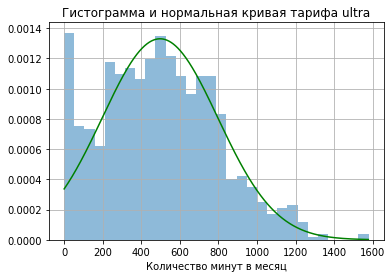

In [82]:
# mean и std берем из предыдущего шага
mu = revenue.query('tariff == "ultra"')['total_min'].mean()
sigma = revenue.query('tariff == "ultra"')['total_min'].std()

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "ultra"')['total_min'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "ultra"')['total_min'].hist(bins=30, alpha=0.5, normed=True)

plt.title('Гистограмма и нормальная кривая тарифа ultra')
plt.xlabel('Количество минут в месяц')
plt.show()

Распределение по **ultra** меньше похоже на нормальное, чем **smart**. Очень ярко выделятеся пик **около нуля**.  Как и в случае со **smart** распределение **обрывается слева**, при этом **средний пик** не так ярко выражен, как в **smart**.  

Посмотрим, как выглядело бы распределение **без учёта** нулевых звонков:

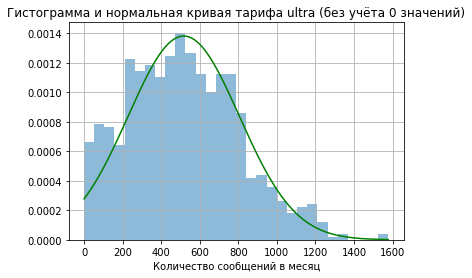

In [83]:
# рассчитываем среднее и стандартное отлокнение для ненулевых значений
mean_wo_zero = revenue.query('tariff == "ultra" and total_min > 0')['total_min'].mean()
std_wo_zero = revenue.query('tariff == "ultra" and total_min > 0')['total_min'].std()

# mean и std: берем рассчитанные значения
mu = mean_wo_zero
sigma = std_wo_zero

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "ultra"')['total_min'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "ultra" and total_min > 0')['total_min'].hist(bins=30, alpha=0.5, normed=True)

plt.title('Гистограмма и нормальная кривая тарифа ultra (без учёта 0 значений)')
plt.xlabel('Количество сообщений в месяц')
plt.show()

Выдающийся околонулевой пик ушёл, но **минимальные** значения всё равно **слишком высоки** для нормального распределения. Значит, количество коротких разговоров в месяц всё равно довольно **высокое**.

### 3.2. Сообщения

В сообщениях более однозначная интерпретация - если **не было сообщений (пропуск)**, значит, их было **ноль**.  
Опыт подсказывает, что в последнее время смс-сообщения не очень популярны и всё больше людей отдаёт предпочтение другим мессенджерам через мобильный интернет. Но возможно, существует группа людей, которые приобретают тариф только ради смс.

Посмотрим, сколько пропусков было заменено на ноль:

In [84]:
# проверка тарифа smart
smart_zero = len(revenue.query('total_messages==0 and tariff=="smart"'))
smart_total = len(revenue.query('tariff=="smart"'))
print('Доля пропусков для тарифа smart: {:.2%}'.format(smart_zero / smart_total))

# проверка тарифа ultra
ultra_zero = len(revenue.query('total_messages==0 and tariff=="ultra"'))
ultra_total = len(revenue.query('tariff=="ultra"'))
print('Доля пропусков для тарифа ultra: {:.2%}'.format(ultra_zero / ultra_total))

Доля пропусков для тарифа smart: 13.77%
Доля пропусков для тарифа ultra: 19.29%


Получается, что для **smart** и для **ultra** мы заменили **14%** и **19%** пропусков соответственно - это довольно внушительно. Но что если все эти пропуски приходятся на пару клиентов из-за которых получается большое количество пропусков? 
Проверим **количество уникальных id пользователей**.

In [85]:
# проверка тарифа smart
print('Количество пользователей, которые хотя бы один месяц не пользовались сообщениями (smart):', end = ' ')
print(revenue.query('total_messages==0 and tariff=="smart"')['user_id'].nunique())
print('Всего активных пользователей smart:', revenue.query('tariff=="smart"')['user_id'].nunique())

# проверка тарифа ultra
print('Количество пользователей, которые хотя бы один месяц не пользовались сообщениями (ultra):', end = ' ')
print(revenue.query('total_messages==0 and tariff=="ultra"')['user_id'].nunique())
print('Всего активных пользователей ultra:', revenue.query('tariff=="ultra"')['user_id'].nunique())

Количество пользователей, которые хотя бы один месяц не пользовались сообщениями (smart): 62
Всего активных пользователей smart: 350
Количество пользователей, которые хотя бы один месяц не пользовались сообщениями (ultra): 28
Всего активных пользователей ultra: 148


Нет, нельзя сказать, что это пара человек, которые не пользуются смс, что влияет на общий результат. Таких пользователей довольно много.
Выведем сводную статистику и боксплот для сообщений:

In [86]:
# вывод сводной статистики
revenue.groupby('tariff')[['total_messages']].describe()

total_messages                                                    
                count       mean        std  min   25%   50%   75%    max
tariff                                                                   
smart          2229.0  33.384029  28.227876  0.0  10.0  28.0  51.0  143.0
ultra           985.0  49.363452  47.804457  0.0   6.0  38.0  79.0  224.0

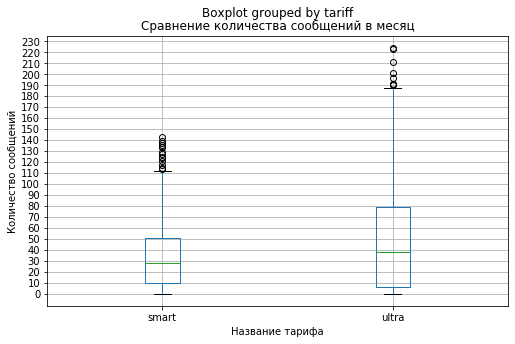

In [87]:
# построение боксплота
revenue.boxplot('total_messages', by='tariff', figsize=(8, 5))

plt.title('Сравнение количества сообщений в месяц')
plt.xlabel('Название тарифа')
plt.ylabel('Количество сообщений')
plt.yticks([i*10 for i in range(24)])
plt.show()

- В среднем людям с тарифом **smart** хватает **от 10 до 51 сообщений** (половина всех случаев выборки).
- Как и в случае со звонками, для тарифа **ultra** размах **шире**: кому-то хватает **до 6 сообщений** (первый квартиль, т. е. четверть случаев до 6 сообщений), а кому-то мало и **79 сообщений** (третий квартиль).  

Если сравнить данные без учёта пропусков (нулевых значений), то значения сместятся наверх.  
В данном случае остановимся на этих усредненных показателях:

In [88]:
# тариф smart
tariffs_stat.loc[1, 'mean'] = revenue.query('tariff == "smart"')['total_messages'].mean()
tariffs_stat.loc[1, 'std'] = revenue.query('tariff == "smart"')['total_messages'].std()
tariffs_stat.loc[1, 'var'] = revenue.query('tariff == "smart"')['total_messages'].std() ** 2
# тариф ultra
tariffs_stat.loc[4, 'mean'] = revenue.query('tariff == "ultra"')['total_messages'].mean()
tariffs_stat.loc[4, 'std'] = revenue.query('tariff == "ultra"')['total_messages'].std()
tariffs_stat.loc[4, 'var'] = revenue.query('tariff == "ultra"')['total_messages'].std() ** 2

tariffs_stat

,tariff,service,mean,std,var
0,smart,calls_min,394.427,179.962,32386.4
1,smart,messages,33.384,28.2279,796.813
2,smart,internet_mb,-,-,-
3,ultra,calls_min,497.068,299.904,89942.5
4,ultra,messages,49.3635,47.8045,2285.27
5,ultra,internet_mb,-,-,-


Перейдем к гистограммам. Построим сначала совместные гистограммы:

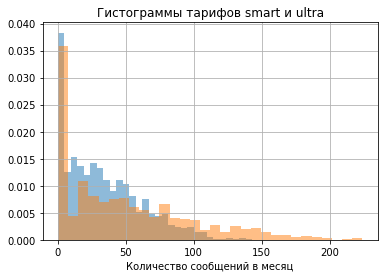

In [89]:
# гистограмма для тарифа smart
revenue.query('tariff == "smart"')['total_messages'].hist(bins=30, alpha=0.5, normed=True)
# гистограмма для тарифа ultra
revenue.query('tariff == "ultra"')['total_messages'].hist(bins=30, alpha=0.5, normed=True)

plt.title('Гистограммы тарифов smart и ultra')
plt.xlabel('Количество сообщений в месяц')
plt.show()

В обоих случаях присутствует более чем выдающийся **пик около 0**. Это неудивительно, поскольку в данных было много пропусков, которые мы заменили на ноль. Если учитывать 0, то распределение **не похоже на нормальное**: **пик** приходится на **нулевое значение**, распределение **не симметрично**.

Интереснее будет посмотреть как соотносится распределение с нормальным, если мы **не будем** учитывать нулевые значения.  
Построим гистограмму для **smart** и дополнительно проведем линию **лимита** (50 сообщений).

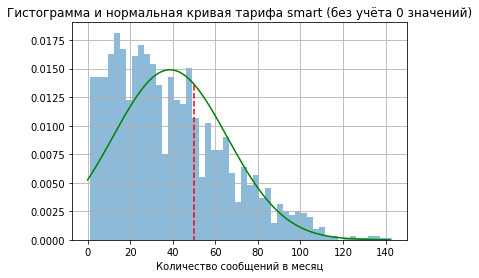

In [90]:
# рассчитываем среднее и стандартное отлокнение для ненулевых значений
mean_wo_zero = revenue.query('tariff == "smart" and total_messages > 0')['total_messages'].mean()
std_wo_zero = revenue.query('tariff == "smart" and total_messages > 0')['total_messages'].std()

# mean и std: берем рассчитанные значения
mu = mean_wo_zero
sigma = std_wo_zero

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "smart"')['total_messages'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "smart" and total_messages > 0')['total_messages'].hist(bins=50, alpha=0.5, normed=True)

# проведем линию лимита
x1, y1 = [50, 50], [0.0136, 0]
plt.plot(x1, y1, linestyle='--', color='red')

plt.title('Гистограмма и нормальная кривая тарифа smart (без учёта 0 значений)')
plt.xlabel('Количество сообщений в месяц')
plt.show()

Распределение для тарифа smart без нулевых сообщений больше похоже не на нормальное, на **распределение Пуассона**. По-прежнему видна **асимметрия**, пик которой концентрируется в районе 15-30 сообщений.

Построим гистограмму для **ultra**. Линию лимита указывать не будем, т. к. встретившийся максимум 224 сообщения, а лимит тарифа 1000 сообщений:

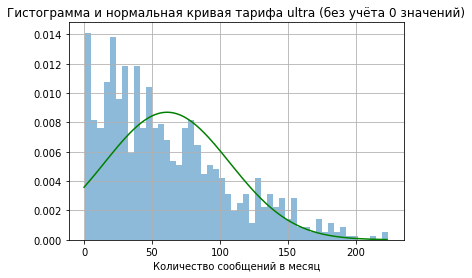

In [91]:
# рассчитываем среднее и стандартное отлокнение для ненулевых значений
mean_wo_zero = revenue.query('tariff == "ultra" and total_messages > 0')['total_messages'].mean()
std_wo_zero = revenue.query('tariff == "ultra" and total_messages > 0')['total_messages'].std()

# mean и std: берем рассчитанные значения
mu = mean_wo_zero
sigma = std_wo_zero

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "ultra"')['total_messages'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "ultra" and total_messages > 0')['total_messages'].hist(bins=50, alpha=0.5, normed=True)

plt.title('Гистограмма и нормальная кривая тарифа ultra (без учёта 0 значений)')
plt.xlabel('Количество сообщений в месяц')
plt.show()

Распределение для тарифа **ultra без нулевых сообщений** - похожая ситуация, что и со **smart**, распределение **асимметрично**, количество сообщений постепенно снижается.

- Таким образом обнаружено, что в таблице по клиентам и месяцам есть значительная **доля пользователей**, которая **хотя бы один месяц не отправляла** ни одного смс, несмотря на то, что они включены в пакет.  
- При изучении распределения, если включить 0 сообщения, то пик придётся именно на них. Если же **исключить их**, распределение всё равно будет **асимметричным**.

### 3.3. Интернет

Проверим, сколько в датафрейме строк с **нулевыми значениями**, т. е. за месяц человек ни разу не подключался к мобильному интернету:

In [92]:
# проверка тарифа smart
smart_zero = len(revenue.query('total_mb==0 and tariff=="smart"'))
smart_total = len(revenue.query('tariff=="smart"'))
print('Доля пропусков для тарифа smart: {:.2%}'.format(smart_zero / smart_total))

# проверка тарифа ultra
ultra_zero = len(revenue.query('total_mb==0 and tariff=="ultra"'))
ultra_total = len(revenue.query('tariff=="ultra"'))
print('Доля пропусков для тарифа ultra: {:.2%}'.format(ultra_zero / ultra_total))

Доля пропусков для тарифа smart: 0.09%
Доля пропусков для тарифа ultra: 1.12%


Итак, доля таких случаев, когда человек вообще не пользовался интернетом, очень небольшая. Любопытно, что доля выше для тарифа **ultra**, где включенный лимит интернета достаточно высокий.  
Будем работать с информацией с нулевыми значениями. Посмотрим сводную статистику и боксплоты для smart и ultra:

In [93]:
# вывод сводной статистики
revenue.groupby('tariff')[['total_mb']].describe()

total_mb                                                       \
          count          mean           std  min       25%       50%   
tariff                                                                 
smart    2229.0  16208.386990   5870.476681  0.0  12643.01  16506.84   
ultra     985.0  19468.805208  10087.170752  0.0  11770.26  19308.01   

                            
             75%       max  
tariff                      
smart   20042.93  38552.45  
ultra   26837.69  49745.69

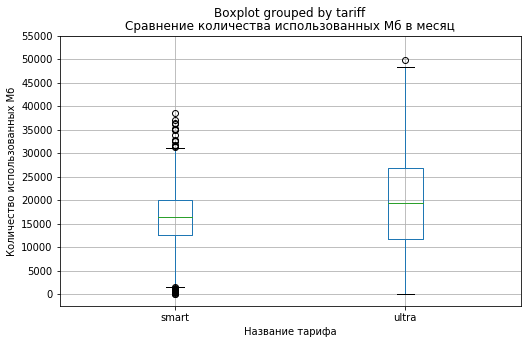

In [94]:
# построение боксплота
revenue.boxplot('total_mb', by='tariff', figsize=(8, 5))

plt.title('Сравнение количества использованных Мб в месяц')
plt.xlabel('Название тарифа')
plt.ylabel('Количество использованных Мб')
plt.yticks([i*5000 for i in range(12)])
plt.show()

- Для **ultra** половина всех случаев приходится на промежуток **от 11.7 Гб и 26.8 Гб** (в тариф включено 30 Гб); для **smart** - **от 12.6 Гб до 20 Гб** (включено 15 Гб).  
- **Медиана** и **среднее** для тарифа **smart** порядка **16 Гб** - значит, 15 Гб не всегда хватает клиентам тарифа.
- Для тарифа **ultra** **медиана** и **среднее** порядка **19 Гб**.  
- **Максимум** для тарифа **smart** - это 38.6 Гб, а для **ultra** - это 49.7 Гб за месяц. 

Заполним данные по интернету (среднее, стандартное отклонение, дисперсия).  
Как и в предыдущих случаях, остановимся на показателях с заменой пропусков на 0 Мб:

In [95]:
# тариф smart
tariffs_stat.loc[2, 'mean'] = revenue.query('tariff == "smart"')['total_mb'].mean()
tariffs_stat.loc[2, 'std'] = revenue.query('tariff == "smart"')['total_mb'].std()
tariffs_stat.loc[2, 'var'] = revenue.query('tariff == "smart"')['total_mb'].std() ** 2
# тариф ultra
tariffs_stat.loc[5, 'mean'] = revenue.query('tariff == "ultra"')['total_mb'].mean()
tariffs_stat.loc[5, 'std'] = revenue.query('tariff == "ultra"')['total_mb'].std()
tariffs_stat.loc[5, 'var'] = revenue.query('tariff == "ultra"')['total_mb'].std() ** 2

tariffs_stat

,tariff,service,mean,std,var
0,smart,calls_min,394.427,179.962,32386.4
1,smart,messages,33.384,28.2279,796.813
2,smart,internet_mb,16208.4,5870.48,3.44625e+07
3,ultra,calls_min,497.068,299.904,89942.5
4,ultra,messages,49.3635,47.8045,2285.27
5,ultra,internet_mb,19468.8,10087.2,1.01751e+08


Завершив заполнение таблицы со статистиками, перейдем к **гистограммам**. Сначала построим совместные гистограммы:

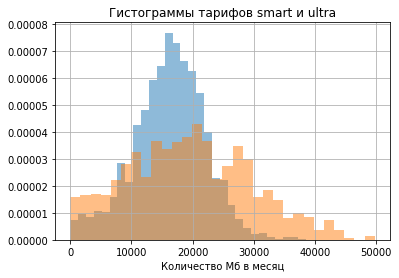

In [96]:
# гистограмма для тарифа smart
revenue.query('tariff == "smart"')['total_mb'].hist(bins=30, alpha=0.5, normed=True)
# гистограмма для тарифа ultra
revenue.query('tariff == "ultra"')['total_mb'].hist(bins=30, alpha=0.5, normed=True)

plt.title('Гистограммы тарифов smart и ultra')
plt.xlabel('Количество Мб в месяц')
plt.show()

- Как и в случае со звонками и сообщениями, распределение **smart** имеет более ярко выраженный средний пик и по форме напоминает **нормальное** распределение.
- В **ultra** более **широкий рамзмах** и нет такого же ярко выраженного пика, как в **smart**.  

Наложим на каждую из гистограмм **кривую нормального распределения** и **лимит** по Мб в месяц.  
Сначала построи гистограмму по тарифу **smart**, лимит 15360 Мб:

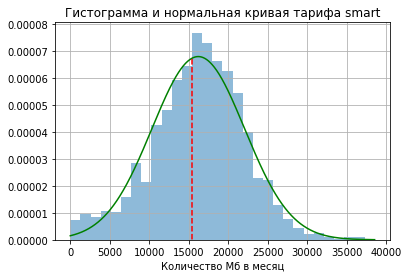

In [97]:
# mean и std берем из предыдущего шага
mu = revenue.query('tariff == "smart"')['total_mb'].mean()
sigma = revenue.query('tariff == "smart"')['total_mb'].std()

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "smart"')['total_mb'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "smart"')['total_mb'].hist(bins=30, alpha=0.5, normed=True)

# проведем линию лимита
x1, y1 = [15360, 15360], [0.000067, 0]
plt.plot(x1, y1, linestyle='--', color='red')

plt.title('Гистограмма и нормальная кривая тарифа smart')
plt.xlabel('Количество Мб в месяц')
plt.show()

**Распределение** выборочных данных по тарифу **smart** **похоже на нормальное**. Снова слева видим не плавный хвост, а небольшой обрыв, т. е. **"околонулевые"** значения несколько **выше нормального**.

Как и в случае со звонками, допустим, что имеем дело с **нормальным** распределением и посмотрим, какой **процент** значений будет **меньше или равен** лимиту в 15360 Мб:

In [98]:
# лимит в 15360 Мб
x = 15360

# расчёт вероятности получить значение x 
result = st.norm(mu, sigma).cdf(x) 
print('Вероятность потратить в месяц 15 Гб и меньше: {:.2%}'.format(result))

Вероятность потратить в месяц 15 Гб и меньше: 44.25%


Если усреднить всех пользователей и усреднить все месяца, т. е. допустить, что все пользователи плюс-минус ведут себя одинаково и все месяца тоже приблизительно одинаковые, то лимит **не будет превышен** только в **44% случаев**. То есть в **более половины** случаев лимит **будет превышен**.

Посмотрим отдельно на распределение тарифа **ultra** с лимитом в **30720 Мб** и сразу рассчитаем значение вероятности потратить **лимит либо меньше лимита**:

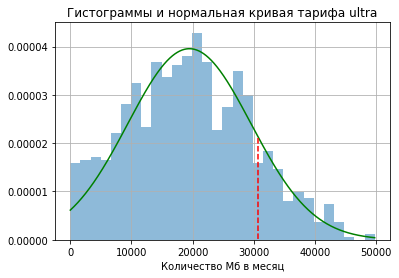

In [99]:
# mean и std берем из предыдущего шага
mu = revenue.query('tariff == "ultra"')['total_mb'].mean()
sigma = revenue.query('tariff == "ultra"')['total_mb'].std()

# в качестве ограничения диапазона возьмём округленное максимальное значение
max_value = int(np.round(revenue.query('tariff == "ultra"')['total_mb'].max()))

# указание диапазона кривой
x = range(0, max_value)
norm_distr = norm.pdf(x, mu, sigma)

# построение нормальной кривой
plt.plot(range(0, max_value), norm_distr[0:], 'g-')

# построение гистограммы
revenue.query('tariff == "ultra"')['total_mb'].hist(bins=30, alpha=0.5, normed=True)

# проведем линию лимита
x1, y1 = [30720, 30720], [0.000021, 0]
plt.plot(x1, y1, linestyle='--', color='red')

plt.title('Гистограммы и нормальная кривая тарифа ultra')
plt.xlabel('Количество Мб в месяц')
plt.show()

In [100]:
# лимит в 30720 Мб
x = 30720

# расчёт вероятности получить значение x 
result = st.norm(mu, sigma).cdf(x) 
print('Вероятность потратить в месяц 30 Гб и меньше: {:.2%}'.format(result))

Вероятность потратить в месяц 30 Гб и меньше: 86.77%


И снова распределение для тарифа **ultra** меньше похоже на нормальное, чем для тарифа **smart**. **Слева** есть **обрыв значений** и минимальные значения **выше нормального**. На графике видно, что в большинстве месяцев люди тратят **меньше лимита**. При нормальном распределении данных этот показатель был бы порядка **86%**.

В качестве финального шага выведем ещё раз получившуюся таблицу с расчётом заданных показателей:

In [101]:
# финальная таблица с расчётами
tariffs_stat

,tariff,service,mean,std,var
0,smart,calls_min,394.427,179.962,32386.4
1,smart,messages,33.384,28.2279,796.813
2,smart,internet_mb,16208.4,5870.48,3.44625e+07
3,ultra,calls_min,497.068,299.904,89942.5
4,ultra,messages,49.3635,47.8045,2285.27
5,ultra,internet_mb,19468.8,10087.2,1.01751e+08


Таким образом, мы изучили сводную статистику по всем видам связи и для каждого случая построили гистограммы с интерпретацией результата.

## Шаг 3. Вывод
    
Характеристики **по видам услуг**:

- **3.1. Телефонные звонки**
 - По тарифу **smart** выбранные клиенты в основном укладываются в **400 минут в месяц** (включено в тариф 500 минут), а по тарифу **ultra** в **500 минут** (включено 3000 минут).
 - При этом размах у **ultra шире**, чем у **smart**: первая квартиль располагается на уровне первой квартили тарифа **smart** (около 267 минут), а третья квартиль - на уровне 711 минут.

- **3.2. Сообщения**
 - В среднем людям с тарифом **smart** хватает **от 10 до 51 сообщений** (половина всех случаев выборки).
 - Как и в случае со звонками, для тарифа **ultra** размах **шире**: кому-то хватает **до 6 сообщений** (первый квартиль, т. е. четверть случаев до 6 сообщений), а кому-то мало и **79 сообщений** (третий квартиль). 

- **3.3.Интернет**
 - Для **ultra** половина всех случаев приходится на промежуток **от 11.7 Гб и 26.8 Гб** (в тариф включено 30 Гб); для **smart** - **от 12.6 Гб до 20 Гб** (включено 15 Гб).  
 - **Медиана** и **среднее** для тарифа **smart** порядка **16 Гб** - значит, 15 Гб не всегда хватает клиентам тарифа.
 - Для тарифа **ultra** **медиана** и **среднее** порядка **19 Гб**.  
 - **Максимум** для тарифа **smart** - это 38.6 Гб, а для **ultra** - это 49.7 Гб за месяц.

Характеристики **распределений** тарифов:

- По тарифу **smart** в случае со **звонкаим** и **интернетом** распределение наиболее похоже на **нормальное**: оно унимодально и симметрично.  
- По тарифа **ultra** в случае со **звонкаим** и **интернетом** распределение меньше похоже на **нормальное**. В нем нет явно выраженной асимметрии, но при этом пик среднего менее выражен, чем для тарифа **smart**. 
- Для **обоих тарифов** (звонки и интернет) наблюдается **обрыв значений слева** и тенденция к тому, что **минимальные** значения **выше нормального**.  
- В **обоих тарифах** распределение по **сообщениям** напоминает **пуассоновское** распределение: распределения асимметричны, с увеличением значения снижается частота появления.

## Шаг 4. Проверка гипотез

Необходимо проверить следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

**Нулевая гипотеза H₀**: в средней выручке пользователей тарифов "Смарт" и "Ультра" **разницы нет, выручка одинакова**.  
**Альтернативная гипотеза H₁**: средняя выручка пользователей тарифов "Смарт" и "Ультра" **не одинакова**.

Выведем несколько строк рабочего датафрейма и сделаем **срезы с выручкой** по обоим тарифам. Из этих срезов возьмем Series, которые будут использованы в качестве выборочного массива для сравнения.

In [102]:
# первые строки рабочего датафрейма
revenue.head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,per_message,per_gb,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee,final_monthly_payment
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,...,1,150,0,0,0,0,0,0,0,1950


In [103]:
# выручка по тарифу smart
sample_smart = revenue.query('tariff=="smart"')['final_monthly_payment']

print('Количество элементов выборки:', len(sample_smart))
print(sample_smart.head())

Количество элементов выборки: 2229
985    1150
986     550
987     550
988    1150
989    1550
Name: final_monthly_payment, dtype: int64


In [104]:
# выручка по тарифу ultra
sample_ultra = revenue.query('tariff=="ultra"')['final_monthly_payment']

print('Количество элементов выборки:', len(sample_ultra))
print(sample_ultra.head())

Количество элементов выборки: 985
0    1950
1    1950
2    1950
3    1950
4    1950
Name: final_monthly_payment, dtype: int64


In [105]:
# выведем параметры Series тарифа smart и ultra
concat = pd.concat([sample_smart.describe(), sample_ultra.describe()], axis=1)
concat.columns = ['smart', 'ultra']
concat

,smart,ultra
count,2229.000000,985.000000
mean,1257.588605,2070.152284
std,800.915599,376.187114
min,550.000000,1950.000000
25%,550.000000,1950.000000
50%,962.000000,1950.000000
75%,1733.000000,1950.000000
max,6614.000000,4800.000000


Для проверки гипотезы о равенстве двух выборочных средних используем **парный t-тест для независимых выборок**.  
Стандартным пороговым значением p-уровня значимости является значение **0.05** - установим такой порог.  
Будем считать, что выборки взяты из не схожих по параметрам совокупностей. Поэтому дополнительно укажем параметр **equal_var = False**.

In [106]:
# установка порога p-уровня значимости
alpha = .05

# применение теста
results = st.ttest_ind(sample_smart, sample_ultra, equal_var = False)

# вывод результатов
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.179723168444486e-274
Отвергаем нулевую гипотезу


Вероятность получить различие между средними выручками от тарифов случайно крайне мала. Это даёт нам основание **отвергнуть нулевую гипотезу** о том, что средняя выручка по тарифам одинакова и разницы нет.  

Отметим, что p-значение настолько маленькое, что мы могли бы воспользоваться и **более жестким критерием альфа 0.01** - даже с таким p-уровнем значимости нулевая гипотеза была бы отвергнута.

### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Нулевая гипотеза H₀**: в средней выручке пользователей из Москвы и других городов **разницы нет**, выручка одинакова.  
**Альтернативная гипотеза H₁**: средняя выручка пользователей из Москвы и других городов **не одинакова**.

Добавим в рабочий датафрейм **колонку с городом** и **колонку boolean (является ли город Москвой)**.  
Возьмём недостающую информацию из **датафрейма users** и соединим данные по **user_id**.

In [107]:
# сбросим индексы в users
users.reset_index(inplace=True)

# соединим данные в датафрейм revenue_info_city
revenue_info_city = pd.merge(revenue, users[['user_id', 'city']], on = 'user_id')
revenue_info_city.head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,per_gb,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee,final_monthly_payment,city
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,...,150,0,0,0,0,0,0,0,1950,Краснодар
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,...,150,0,0,0,0,0,0,0,1950,Краснодар
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,...,150,0,0,0,0,0,0,0,1950,Краснодар
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,...,150,0,0,0,0,0,0,0,1950,Краснодар
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,...,150,0,0,0,0,0,0,0,1950,Краснодар


In [108]:
# создадим колонку boolean
revenue_info_city['is_moscow'] = [x == 'Москва' for x in revenue_info_city['city']]
revenue_info_city.head()

,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee,final_monthly_payment,city,is_moscow
0,1000,5,22.0,5.0,150.06,22.0,2253.49,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Краснодар,False
1,1000,6,43.0,15.0,158.90,60.0,23233.77,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Краснодар,False
2,1000,7,47.0,6.0,318.80,75.0,14003.64,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Краснодар,False
3,1000,8,52.0,10.0,389.87,81.0,14055.93,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Краснодар,False
4,1000,9,58.0,12.0,440.14,57.0,14568.91,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Краснодар,False


In [109]:
# проверим, чтобы количество значений по колонкам совпадало
# проверка количества
print('Количество в колонке city:', len(revenue_info_city.query('city == "Москва"')))
print('Количество в колонке is_moscow:', revenue_info_city.is_moscow.sum())

# вывод нескольких строк для проверки
revenue_info_city.query('city == "Москва"').head()

Количество в колонке city: 611
Количество в колонке is_moscow: 611


,user_id,user_month,call_times,call_times_zero,total_min,total_messages,total_mb,tariff,incl_min,incl_messages,...,extra_min,extra_messages,extra_mb,extra_gb,extra_min_fee,extra_message_fee,extra_gb_fee,final_monthly_payment,city,is_moscow
8,1003,8,55.0,12.0,355.67,37.0,8565.21,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Москва,True
9,1003,9,134.0,29.0,904.89,91.0,12468.87,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Москва,True
10,1003,10,108.0,11.0,809.07,83.0,14768.14,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Москва,True
11,1003,11,115.0,20.0,775.39,94.0,11356.89,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Москва,True
12,1003,12,108.0,20.0,755.50,75.0,10121.53,ultra,3000,1000,...,0,0,0,0,0,0,0,1950,Москва,True


Мы добавили колонки с необходимой информацией. Теперь можем сделать нужные срезы для сравнения.

In [110]:
# выручка по Москве
sample_moscow = revenue_info_city.query('is_moscow == True')['final_monthly_payment']

print('Количество элементов выборки:', len(sample_moscow))
print(sample_moscow.head())

Количество элементов выборки: 611
8     1950
9     1950
10    1950
11    1950
12    1950
Name: final_monthly_payment, dtype: int64


In [111]:
# выручка по другие регионам
sample_other = revenue_info_city.query('is_moscow == False')['final_monthly_payment']

print('Количество элементов выборки:', len(sample_other))
print(sample_other.head())

Количество элементов выборки: 2603
0    1950
1    1950
2    1950
3    1950
4    1950
Name: final_monthly_payment, dtype: int64


In [112]:
# выведем параметры Series для Москвы и не Москвы
concat = pd.concat([sample_moscow.describe(), sample_other.describe()], axis=1)
concat.columns = ['moscow', 'other_city']
concat

,moscow,other_city
count,611.000000,2603.000000
mean,1526.837971,1501.869766
std,750.221433,802.533059
min,550.000000,550.000000
25%,750.000000,716.500000
50%,1750.000000,1550.000000
75%,1950.000000,1950.000000
max,5186.000000,6614.000000


Для проверки второй гипотезы так же используем **парный t-тест для независимых выборок**.  
Возьмем за порог p-значения **0.05**. Будем считать, что выборки взяты из схожих по параметрам совокупностей, поэтому дополнительные параметры не требуются.

In [113]:
# установка порога p-уровня значимости
alpha = .05

# применение теста
results = st.ttest_ind(sample_moscow, sample_other)

# вывод результатов
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4836504757759247
Не получилось отвергнуть нулевую гипотезу


Даже при стандартном пороге p-уровня значимости у нас **не получилось отвергнуть нулевую гипотезу**. Значит, есть основания предполагать, что в средней выручке между Москвой и другими регионами **разницы нет**.

## Шаг 4. Вывод

Мы проверили две гипотезы о различии средней выручки:
- **Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**.  
    - **Нулевая гипотеза**: в генеральной совокупности **различий** между средней выручкой двух тарифов **нет**.  
    - Результат проведения **парного t-теста для двух независимых выборок** дал нам основание **отклонить** нулевую гипотезу о том, что разницы в средней выручке тарифов нет. Соответственно, у нас есть основания предполагать, что верна **альтернативная гипотеза**: средняя выручка тарифов **различна**.
    
    
- **Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**
    - **Нулевая гипотеза**: в генеральной совокупности **различий** между среднией выручкой Москвы и регионов **нет**.
    - Результат проведения **парного t-теста для двух независимых выборок** не дал нам основания **отклонить** нулевую гипотезу о том, что разницы в средней выручке между Москвой и регионами нет. Соответственно, у нас есть основания предполагать, что верна **нулевая гипотеза**: средняя выручка тарифов **не различается**.

# Итоговый вывод

## Шаг 1. Открытие и изучение файла

- Были выгружены и изучены предоставленные данные:
 - **Файл calls.csv** (данные по телефонным звонкам) - 202607 строк и 4 колонки
 - **Файл internet.csv** (данные по использованию интернета) - 149396 строк и 4 колонки
 - **Файл messages.csv** (данные по сообщениям) - 123036 строк и 3 колонки
 - **Файл tariffs.csv** (описание тарифов) - 2 строки и 8 колонок
 - **Файл users.csv** (выборочная информация о пользователях) - 500 строк и 8 колонок
- Файлы не содержали необъяснимых пропусков и дубликатов.

## Шаг 2. Предобработка и подготовка данных

Мы разбили шаг на два этапа:
- На **первом этапе** мы проверили данные всех исходных датафреймов на предмет адекватности. Например, сколько уникальных id есть в колонке, какие даты содержатся в колонках, сколько минут в среднем разговаривали люди. 
    
- На **втором этапе** мы сгруппировали данные по пользователям и месяцам **по каждому из видов услуг**, соединили данные и дополнили **стоимостью** из информации по тарифам. В итоге мы рассчитали **финальную стоимость** услуг для пользователя в данном месяце.  
При расчёте было учтено, что звонки и Мб округляются в бóльшую сторону и что для Мб при использовании дополительного трафика даётся сразу дополнительный Гб.

## Шаг 3. Описание поведения клиентов

Характеристики **по видам услуг**:

- **3.1. Телефонные звонки**
 - По тарифу **smart** выбранные клиенты в основном укладываются в **400 минут в месяц** (включено в тариф 500 минут), а по тарифу **ultra** в **500 минут** (включено 3000 минут).
 - При этом размах у **ultra шире**, чем у **smart**: первая квартиль располагается на уровне первой квартили тарифа **smart** (около 267 минут), а третья квартиль - на уровне 711 минут.

- **3.2. Сообщения**
 - В среднем людям с тарифом **smart** хватает **от 10 до 51 сообщений** (половина всех случаев выборки).
 - Как и в случае со звонками, для тарифа **ultra** размах **шире**: кому-то хватает **до 6 сообщений** (первый квартиль, т. е. четверть случаев до 6 сообщений), а кому-то мало и **79 сообщений** (третий квартиль). 

- **3.3.Интернет**
 - Для **ultra** половина всех случаев приходится на промежуток **от 11.7 Гб и 26.8 Гб** (в тариф включено 30 Гб); для **smart** - **от 12.6 Гб до 20 Гб** (включено 15 Гб).  
 - **Медиана** и **среднее** для тарифа **smart** порядка **16 Гб** - значит, 15 Гб не всегда хватает клиентам тарифа.
 - Для тарифа **ultra** **медиана** и **среднее** порядка **19 Гб**.  
 - **Максимум** для тарифа **smart** - это 38.6 Гб, а для **ultra** - это 49.7 Гб за месяц.

Характеристики **распределений** тарифов:

- По тарифу **smart** в случае со **звонкаим** и **интернетом** распределение наиболее похоже на **нормальное**: оно унимодально и симметрично.  
- По тарифа **ultra** в случае со **звонкаим** и **интернетом** распределение меньше похоже на **нормальное**. В нем нет явно выраженной асимметрии, но при этом пик среднего менее выражен, чем для тарифа **smart**. 
- Для **обоих тарифов** (звонки и интернет) наблюдается **обрыв значений слева** и тенденция к тому, что **минимальные** значения **выше нормального**.  
- В **обоих тарифах** распределение по **сообщениям** напоминает **пуассоновское** распределение: распределения асимметричны, с увеличением значения снижается частота появления.

 
## Шаг 4. Проверка гипотез

Мы проверили две гипотезы о различии средней выручки:
- **Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**.  
    - **Нулевая гипотеза**: в генеральной совокупности **различий** между средней выручкой двух тарифов **нет**.  
    - Результат проведения **парного t-теста для двух независимых выборок** дал нам основание **отклонить** нулевую гипотезу о том, что разницы в средней выручке тарифов нет. Соответственно, у нас есть основания предполагать, что верна **альтернативная гипотеза**: средняя выручка тарифов **различна**.
    
    
- **Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**
    - **Нулевая гипотеза**: в генеральной совокупности **различий** между среднией выручкой Москвы и регионов **нет**.
    - Результат проведения **парного t-теста для двух независимых выборок** не дал нам основания **отклонить** нулевую гипотезу о том, что разницы в средней выручке между Москвой и регионами нет. Соответственно, у нас есть основания предполагать, что верна **нулевая гипотеза**: средняя выручка тарифов **не различается**.